# Open Market Backtesting

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import wrds
import sys
sys.path.append('..')

# Import Main Python Modules
from src.dataframe_construction import *
from src.a_estimation import *
from src.optimal_strategies import *
from src.backtest import *


### Setting up the data

In [3]:
daily = False
datapath='../data/'

if daily:
    d = 3000
    start_date='2013-01-01'
    filename='CRSP_2013_2018_daily_cleaned.h5'
    caps_table='dlyprevcap'
    returns_table='dlyret'
else:
    d = 2000
    start_date='1965-01-01'
    filename='CRSP_monthly_cleaned.h5'
    caps_table='mthprevcap'
    returns_table='mthret'

df = Data(d=d, start_date=start_date, datapath=datapath, filename=filename, caps_table=caps_table, returns_table=returns_table)

### Estimating $a$ and Computing Optimal Strategy

/home/pedro/Downloads/mathematical_finance/2-notebooks/../src/a_estimation.py:25: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/pedro/Downloads/mathematical_finance/2-notebooks/../src/a_estimation.py:25: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


[-1.10904409 -1.10717106 -1.1053012  -1.1034345  -1.10157095]


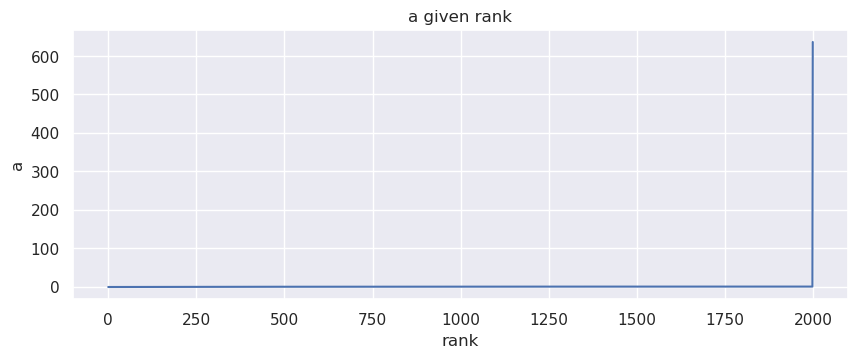

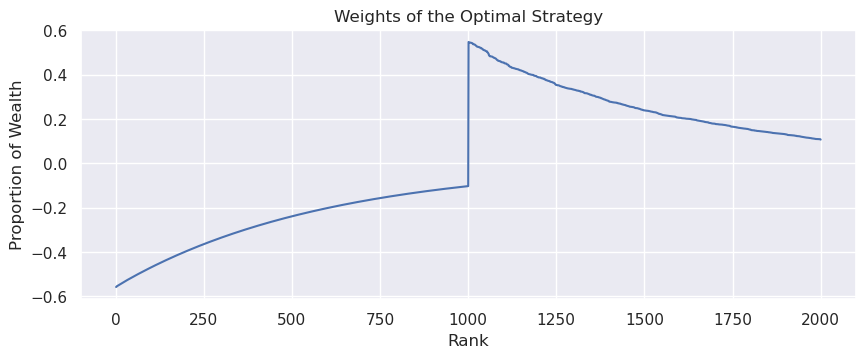

In [4]:
# Estimate a
method = 'direct_log'
smooth_method = 'exponential_decay'
smooth_parameter = 1
smooth_a = False

a = estimate_a(df.weights_by_rank, smooth_method=smooth_method, smooth_parameter=smooth_parameter,  smooth_a=smooth_a)
print(a[:5])
plot_a(a[:])

# Compute Strategy
setting = 'mixed'
N = 1000
plot_date = '2013-03-28'

strategy = compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df.weights_by_rank)
plot_strategy(strategy, plot_date)

### Robust Optimal Growth

The Robust Optimal Growth of the Optimal Strategy in the Pure Open Market setting is given by

$$
\hat \lambda _o = \mathbb E^{\beta} \left [ \frac 1 T \log V_T \right] = \frac 1 2 (1-\bar a_1) + \frac 1 8 \int_{\nabla^{d-1}} \left ( \sum_{k=1}^N \frac{a_k^2}{y_k} - \frac{(\bar a_1^N-2)^2}{\bar y_1^N} \right) q(y) dy 
$$

The Robust Optimal Growth Rate in the Mixed Open Market setting is given by

$$
\hat \lambda _o = \mathbb E^{\beta} \left [ \frac 1 T \log V_T \right] = \frac 1 8 (\bar a_1)^2 + \frac 1 8 \int_{\nabla^{d-1}} \left ( \sum_{k=1}^N \frac{a_k^2}{y_k} + \frac{(\bar a_{N+1})^2}{\bar y_{N+1}} \right) q(y) dy 
$$

In the Open Market case we just have
$$
\hat \lambda _o =  \frac 1 2 (1-\bar a_1)  + \frac 1 8 \sum_{k=1}^N a_k^2 \int_{\nabla^{d-1}} \frac{1}{y_k} q(y) dy - \frac 1 8 (\bar a_1^N-2)^2 \int_{\nabla^{d-1}}  \frac{1}{\bar y_1^N} q(y) dy
$$
So we need to estimate 
$$
\int_{\nabla^{d-1}} \frac{1}{y_k} q(y) dy \quad \text{ and } \quad \int_{\nabla^{d-1}}   \frac{1}{\bar y_1^N}  q(y) dy
$$


In [5]:
df.weights_by_rank.head(3)

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
mthcaldt,,,,,,,,,,,,,,,,,,,,,
1965-01-29,0.074882,0.058624,0.040830,0.030144,0.024896,0.023274,0.020658,0.017738,0.012739,0.011723,...,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
1965-02-26,0.071669,0.058544,0.038165,0.031831,0.023814,0.022908,0.020091,0.018226,0.012598,0.012578,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
1965-03-31,0.071080,0.056807,0.035534,0.032139,0.022956,0.021503,0.020365,0.018201,0.012488,0.011709,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
